In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

In [20]:
#0 a 255
X.sample()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(52500, 784) (52500,)
(17500, 784) (17500,)


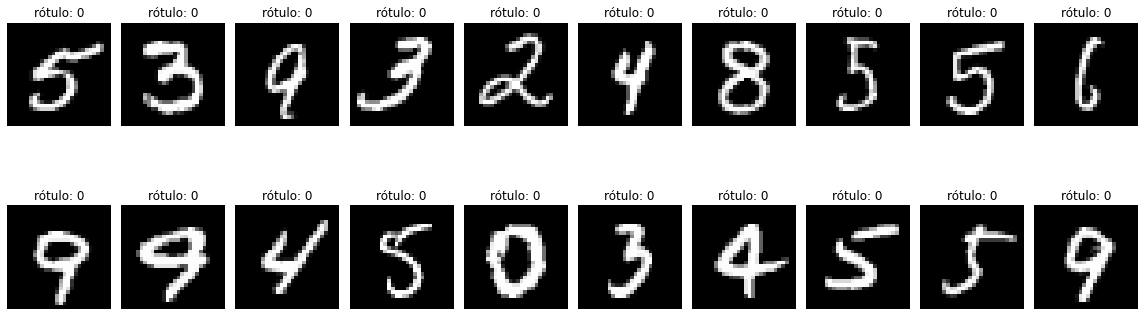

In [6]:
from sklearn.model_selection import train_test_split

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, y_train.shape)
print(X_test.shape , y_test.shape )

import matplotlib.pyplot as plt

img_size = int(np.sqrt(X_train.shape[1]))

fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train.iloc[i].values.reshape(img_size, img_size), cmap='gray')
    ax.axis('off')
    ax.set_title(f"rótulo: {np.argmax(y_train.iloc[i])}")
    
plt.tight_layout()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train)

neigh

KNeighborsClassifier(n_neighbors=100)

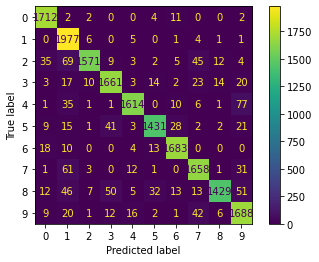

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    neigh,
    X_test,
    y_test,
    #display_labels=class_names,
    normalize=None,
)


# E se k fosse maior?? k=150, 500

In [9]:
import pickle

pickle_out = open("modelo_preditor.pickle","wb")
pickle.dump(neigh, pickle_out)
pickle_out.close()
